In [29]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [32]:
df = pd.read_csv('datasetpreparato.csv')
df1 = pd.read_csv('datatest.txt')

In [33]:
df.drop(['day', 'hour','weekend','daylight', 'Unnamed: 0'], axis = 1, inplace = True)

In [34]:
df.head()

,Temperature,Humidity,Light,CO2,Occupancy
0,23.18,27.2720,426.0,721.25,1
1,23.15,27.2675,429.5,714.00,1
2,23.15,27.2450,426.0,713.50,1
3,23.15,27.2000,426.0,708.25,1
4,23.10,27.2000,426.0,704.50,1


Unnamed: 0       2665
Temperature         0
Humidity            0
Light               0
CO2                 0
Occupancy           0
date             8142
HumidityRatio    8142
dtype: int64

In [35]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10807 entries, 0 to 2804
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     8142 non-null   float64
 1   Temperature    10807 non-null  float64
 2   Humidity       10807 non-null  float64
 3   Light          10807 non-null  float64
 4   CO2            10807 non-null  float64
 5   Occupancy      10807 non-null  int64  
 6   date           2665 non-null   object 
 7   HumidityRatio  2665 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 759.9+ KB


In [200]:
# LA FUNZIONE CHE SEGUE IN TEORIA MI DICE CHE VARIABILI TENERE IN BASE ALLA MULTICOLLINEARITA'.. GIRANDO INTERNET HO TROVATO 
# MULTICOLLINEARITA' FINO A 10 NON E' UN PROBLEMA

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [60]:
calculate_vif_(df, thresh = 10.0)

dropping 'Humidity' at index: 1
dropping 'CO2' at index: 2
Remaining variables:
Index(['Temperature', 'Light', 'Occupancy'], dtype='object')


,Temperature,Light,Occupancy
0,23.18,426.0,1
1,23.15,429.5,1
2,23.15,426.0,1
3,23.15,426.0,1
4,23.10,426.0,1
...,...,...,...
8137,21.05,433.0,1
8138,21.05,433.0,1
8139,21.05,433.0,1
8140,21.10,433.0,1


In [62]:
df = df.drop(['Humidity', 'CO2'], axis = 1)

In [63]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [39]:
y_name = 'Occupancy'

In [64]:
attributes = [col for col in df.columns if col != y_name]
X = df[attributes].values
y = df[y_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [65]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

## LINEAR REGRESSION

In [66]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-0.03489295  0.00201354]
Intercept: 
 0.6905355260906423


In [68]:
y_pred = reg.predict(X_test)

In [69]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.839
MSE: 0.027
MAE: 0.083


## LINEAR REGRESSION IN 2 DIMENSIONS

In [70]:
reg = LinearRegression()
reg.fit(X_train.T[0].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[0].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.306
MSE: 0.116
MAE: 0.260


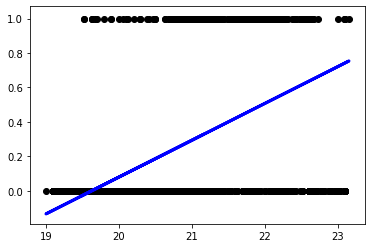

In [71]:
plt.scatter(X_test.T[0], y_test,  color='black')
plt.plot(X_test.T[0], y_pred, color='blue', linewidth=3)
plt.show()

## LASSO

In [72]:
reg = Lasso()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-0.          0.00187023]
Intercept: 
 -0.011709659357210217


In [73]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.834
MSE: 0.028
MAE: 0.078


## RIDGE

In [74]:
reg = Ridge()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-0.0348828  0.0020135]
Intercept: 
 0.6903304638822066


In [75]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.839
MSE: 0.027
MAE: 0.083


## LOGISTIC REGRESSION

In [76]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report

In [133]:
selected_columns = ['Light']
class_name = 'Occupancy'
attributes = [col for col in df.columns if col != class_name]
X = df[selected_columns].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

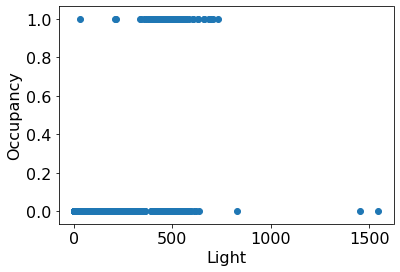

In [137]:
plt.scatter(X_train, y_train)
plt.xlabel('Light', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [187]:
selected_columns = ['Temperature']
class_name = 'Occupancy'
attributes = [col for col in df.columns if col != class_name]
X = df[selected_columns].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [188]:
from sklearn.linear_model import LogisticRegression

In [189]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [190]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8305362259516987
F1-score [0.89524291 0.55674518]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1925
           1       0.62      0.50      0.56       518

    accuracy                           0.83      2443
   macro avg       0.75      0.71      0.73      2443
weighted avg       0.82      0.83      0.82      2443



In [156]:
from sklearn.linear_model import LogisticRegression

In [173]:
selected_columns = ['Temperature']
class_name = 'Occupancy'
attributes = [col for col in df.columns if col != class_name]
X = df[selected_columns].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [174]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [175]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8305362259516987
F1-score [0.89524291 0.55674518]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1925
           1       0.62      0.50      0.56       518

    accuracy                           0.83      2443
   macro avg       0.75      0.71      0.73      2443
weighted avg       0.82      0.83      0.82      2443



In [191]:
from scipy.special import expit

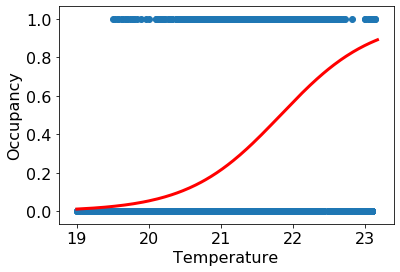

In [192]:
loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='red', linewidth=3)
plt.scatter(X_train, y_train)
plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [193]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

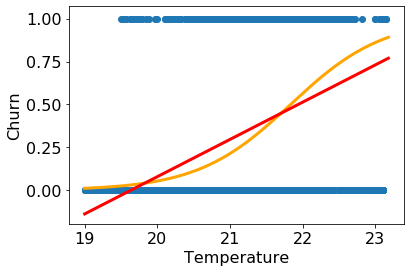

In [194]:
plt.scatter(X_train, y_train)

loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='orange', linewidth=3)

plt.plot(sorted(X_test), reg.coef_ * sorted(X_test) + reg.intercept_, color='red', linewidth=3)


plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Churn', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

### TENTATIVO CON LIGHT

In [195]:
selected_columns = ['Light']
class_name = 'Occupancy'
attributes = [col for col in df.columns if col != class_name]
X = df[selected_columns].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [196]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [197]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9828080229226361
F1-score [0.98898794 0.9608209 ]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1925
           1       0.93      0.99      0.96       518

    accuracy                           0.98      2443
   macro avg       0.96      0.99      0.97      2443
weighted avg       0.98      0.98      0.98      2443



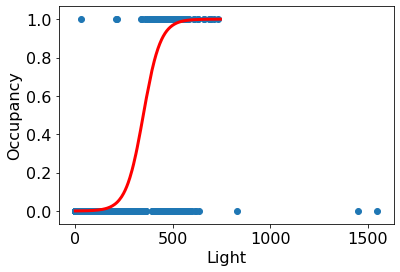

In [198]:
loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='red', linewidth=3)
plt.scatter(X_train, y_train)
plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

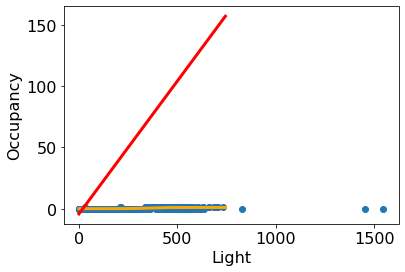

In [199]:
plt.scatter(X_train, y_train)

loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='orange', linewidth=3)

plt.plot(sorted(X_test), reg.coef_ * sorted(X_test) + reg.intercept_, color='red', linewidth=3)


plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()